In [1]:
# Step 1: Import Necessary Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Display plots inline
%matplotlib inline


In [2]:
# Step 2: Load the Dataset
titanic_data = pd.read_csv('C:\\Users\\DELL\\Downloads\\titanic-dataset.csv')

# Display the first few rows of the dataset
print(titanic_data.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [3]:
# Step 3: Data Preprocessing

# Check if critical columns exist
if 'Age' not in titanic_data.columns:
    raise KeyError("Column 'Age' not found in the dataset")
if 'Embarked' not in titanic_data.columns:
    raise KeyError("Column 'Embarked' not found in the dataset")
if 'Sex' not in titanic_data.columns:
    raise KeyError("Column 'Sex' not found in the dataset")
if 'Name' not in titanic_data.columns:
    raise KeyError("Column 'Name' not found in the dataset")

# Handle missing values
imputer = SimpleImputer(strategy='mean')
titanic_data['Age'] = imputer.fit_transform(titanic_data[['Age']])

# Handle missing values in 'Embarked'
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

# Create new features
titanic_data['FamilySize'] = titanic_data['SibSp'] + titanic_data['Parch'] + 1
titanic_data['IsAlone'] = (titanic_data['FamilySize'] == 1).astype(int)
titanic_data['Title'] = titanic_data['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)
titanic_data['Title'] = titanic_data['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
titanic_data['Title'] = titanic_data['Title'].replace('Mlle', 'Miss')
titanic_data['Title'] = titanic_data['Title'].replace('Ms', 'Miss')
titanic_data['Title'] = titanic_data['Title'].replace('Mme', 'Mrs')

# Verify the presence of 'Sex', 'Embarked', and 'Title' columns
print(titanic_data.columns)

# Encode categorical variables
titanic_data = pd.get_dummies(titanic_data, columns=['Sex', 'Embarked', 'Title'], drop_first=True)

# Select features and target variable
X = titanic_data.drop(['Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
y = titanic_data['Survived']


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'FamilySize', 'IsAlone',
       'Title'],
      dtype='object')


C:\Users\DELL\AppData\Local\Temp\ipykernel_13992\3091533343.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)


In [4]:
# Step 1: Import Necessary Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Display plots inline
%matplotlib inline


In [5]:
# Step 2: Load the Dataset
titanic_data = pd.read_csv('C:\\Users\\DELL\\Downloads\\titanic-dataset.csv')

# Display the first few rows of the dataset
print(titanic_data.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [6]:
# Step 3: Data Preprocessing

# Check if critical columns exist
if 'Age' not in titanic_data.columns:
    raise KeyError("Column 'Age' not found in the dataset")
if 'Embarked' not in titanic_data.columns:
    raise KeyError("Column 'Embarked' not found in the dataset")
if 'Sex' not in titanic_data.columns:
    raise KeyError("Column 'Sex' not found in the dataset")
if 'Name' not in titanic_data.columns:
    raise KeyError("Column 'Name' not found in the dataset")

# Handle missing values
imputer = SimpleImputer(strategy='mean')
titanic_data['Age'] = imputer.fit_transform(titanic_data[['Age']])

# Handle missing values in 'Embarked'
titanic_data['Embarked'] = titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0])

# Create new features
titanic_data['FamilySize'] = titanic_data['SibSp'] + titanic_data['Parch'] + 1
titanic_data['IsAlone'] = (titanic_data['FamilySize'] == 1).astype(int)
titanic_data['Title'] = titanic_data['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)
titanic_data['Title'] = titanic_data['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
titanic_data['Title'] = titanic_data['Title'].replace('Mlle', 'Miss')
titanic_data['Title'] = titanic_data['Title'].replace('Ms', 'Miss')
titanic_data['Title'] = titanic_data['Title'].replace('Mme', 'Mrs')

# Verify the presence of 'Sex', 'Embarked', and 'Title' columns
print(titanic_data.columns)

# Encode categorical variables
titanic_data = pd.get_dummies(titanic_data, columns=['Sex', 'Embarked', 'Title'], drop_first=True)

# Select features and target variable
X = titanic_data.drop(['Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
y = titanic_data['Survived']


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'FamilySize', 'IsAlone',
       'Title'],
      dtype='object')


In [7]:
# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
# Step 5: Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [9]:
# Step 6: Model Training and Evaluation

# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
print('Logistic Regression:')
print(f'Accuracy: {accuracy_score(y_test, y_pred_log_reg):.2f}')
print(confusion_matrix(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))

# Random Forest Classifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
y_pred_rf_clf = rf_clf.predict(X_test)
print('Random Forest Classifier:')
print(f'Accuracy: {accuracy_score(y_test, y_pred_rf_clf):.2f}')
print(confusion_matrix(y_test, y_pred_rf_clf))
print(classification_report(y_test, y_pred_rf_clf))

# Support Vector Classifier
svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
print('Support Vector Classifier:')
print(f'Accuracy: {accuracy_score(y_test, y_pred_svc):.2f}')
print(confusion_matrix(y_test, y_pred_svc))
print(classification_report(y_test, y_pred_svc))


Logistic Regression:
Accuracy: 0.82
[[89 16]
 [17 57]]
              precision    recall  f1-score   support

           0       0.84      0.85      0.84       105
           1       0.78      0.77      0.78        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179

Random Forest Classifier:
Accuracy: 0.85
[[93 12]
 [14 60]]
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       105
           1       0.83      0.81      0.82        74

    accuracy                           0.85       179
   macro avg       0.85      0.85      0.85       179
weighted avg       0.85      0.85      0.85       179

Support Vector Classifier:
Accuracy: 0.79
[[91 14]
 [23 51]]
              precision    recall  f1-score   support

           0       0.80      0.87      0.83       105
           1       0.78      0.69      0.73        74

    ac

In [10]:
# Step 7: Hyperparameter Tuning

# Logistic Regression Hyperparameter Tuning
param_grid_log_reg = {'C': [0.01, 0.1, 1, 10, 100], 'solver': ['liblinear', 'lbfgs']}
grid_search_log_reg = GridSearchCV(LogisticRegression(), param_grid_log_reg, cv=5, scoring='accuracy')
grid_search_log_reg.fit(X_train, y_train)
best_log_reg = grid_search_log_reg.best_estimator_
print(f'Best Parameters for Logistic Regression: {grid_search_log_reg.best_params_}')

# Random Forest Hyperparameter Tuning
param_grid_rf = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30]}
grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)
best_rf = grid_search_rf.best_estimator_
print(f'Best Parameters for Random Forest: {grid_search_rf.best_params_}')

# Support Vector Classifier Hyperparameter Tuning
param_grid_svc = {'C': [0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10]}
grid_search_svc = GridSearchCV(SVC(), param_grid_svc, cv=5, scoring='accuracy')
grid_search_svc.fit(X_train, y_train)
best_svc = grid_search_svc.best_estimator_
print(f'Best Parameters for SVC: {grid_search_svc.best_params_}')


Best Parameters for Logistic Regression: {'C': 1, 'solver': 'liblinear'}
Best Parameters for Random Forest: {'max_depth': 10, 'n_estimators': 200}
Best Parameters for SVC: {'C': 100, 'gamma': 0.001}


In [11]:
# Step 8: Cross-Validation
cv_scores_log_reg = cross_val_score(best_log_reg, X, y, cv=10, scoring='accuracy')
print(f'Cross-Validation Accuracy for Logistic Regression: {cv_scores_log_reg.mean():.2f} ± {cv_scores_log_reg.std():.2f}')

cv_scores_rf = cross_val_score(best_rf, X, y, cv=10, scoring='accuracy')
print(f'Cross-Validation Accuracy for Random Forest: {cv_scores_rf.mean():.2f} ± {cv_scores_rf.std():.2f}')

cv_scores_svc = cross_val_score(best_svc, X, y, cv=10, scoring='accuracy')
print(f'Cross-Validation Accuracy for SVC: {cv_scores_svc.mean():.2f} ± {cv_scores_svc.std():.2f}')


Cross-Validation Accuracy for Logistic Regression: 0.82 ± 0.03
Cross-Validation Accuracy for Random Forest: 0.83 ± 0.05
Cross-Validation Accuracy for SVC: 0.48 ± 0.09


        Feature  Importance
5          Fare    0.159387
12     Title_Mr    0.152889
0   PassengerId    0.131471
8      Sex_male    0.122652
2           Age    0.117676
1        Pclass    0.076033
13    Title_Mrs    0.049340
6    FamilySize    0.048692
11   Title_Miss    0.037025
3         SibSp    0.035576
4         Parch    0.021620
10   Embarked_S    0.019227
7       IsAlone    0.011610
14   Title_Rare    0.008895
9    Embarked_Q    0.007906


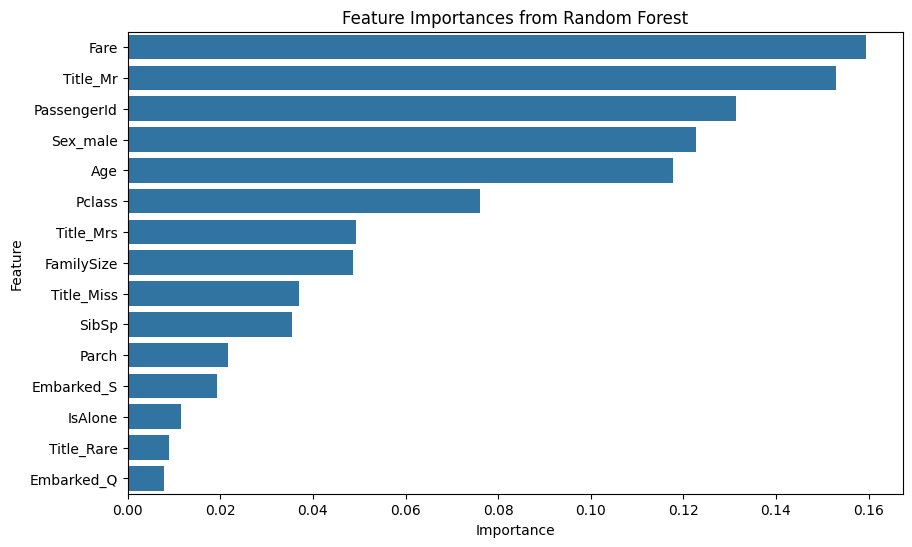

In [12]:
# Step 9: Feature Importance and Interpretation

# Feature importance for Random Forest
importances = best_rf.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances from Random Forest')
plt.show()


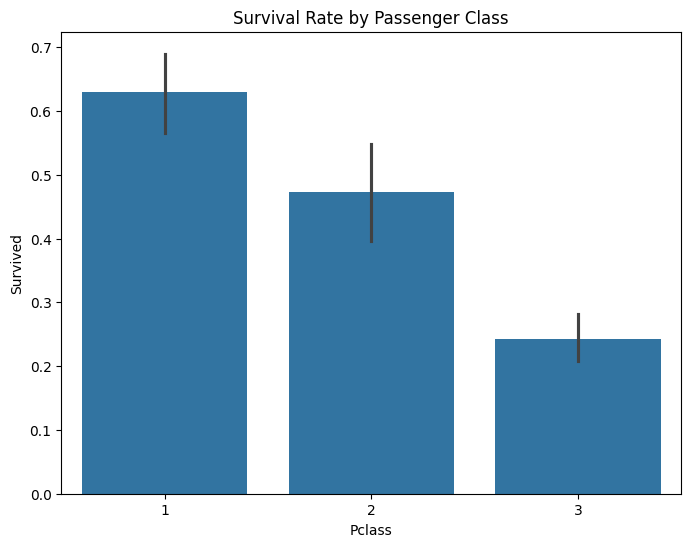

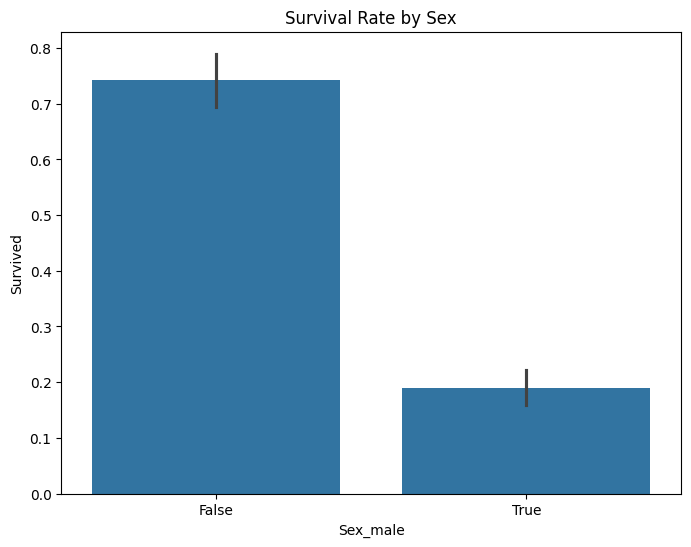

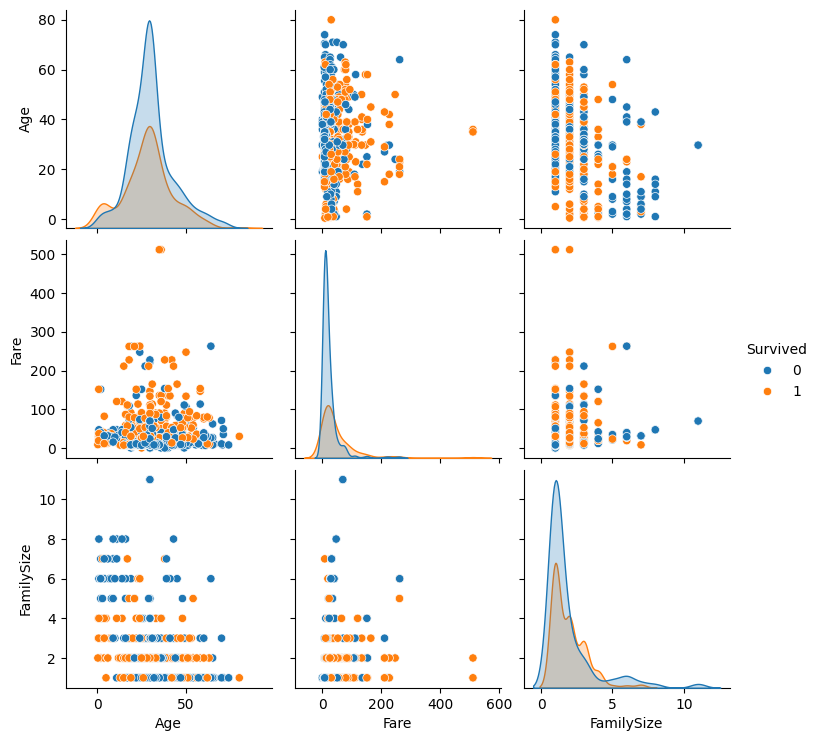

In [13]:
# Step 10: Advanced Data Visualization

# Survival rate by passenger class
plt.figure(figsize=(8, 6))
sns.barplot(x='Pclass', y='Survived', data=titanic_data)
plt.title('Survival Rate by Passenger Class')
plt.show()

# Survival rate by sex
plt.figure(figsize=(8, 6))
sns.barplot(x='Sex_male', y='Survived', data=titanic_data)
plt.title('Survival Rate by Sex')
plt.show()

# Pair plot of numerical features
sns.pairplot(titanic_data[['Age', 'Fare', 'FamilySize', 'Survived']], hue='Survived')
plt.show()
